#Deep Learning
GOAT 박병준

#Activation function 적용  
tanh

#bodyPerformance dataset

##데이터 전처리

In [1]:
import pandas as pd
df=pd.read_csv('/content/bodyPerformance.csv')
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [ ]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [2]:
df.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

In [3]:
print(df['gender'].unique())
print(df['class'].unique())

['M' 'F']
['C' 'A' 'B' 'D']


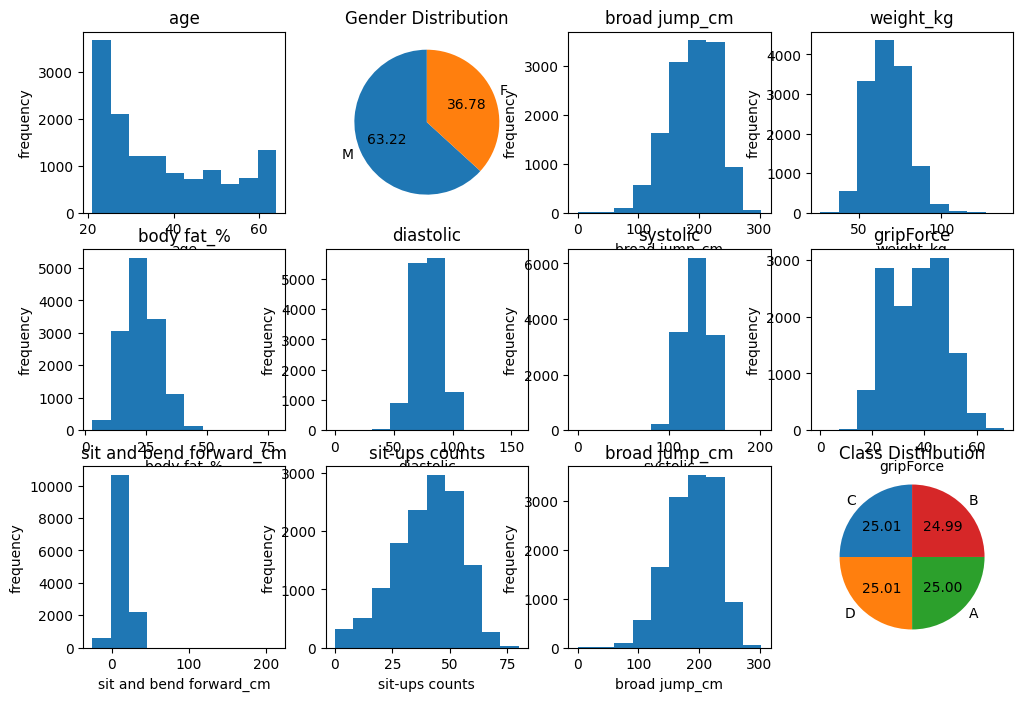

In [7]:
import matplotlib.pyplot as plt

# 시각화를 위한 그래프 크기 설정
plt.figure(figsize=(12, 8))

# age
plt.subplot(341) # 3x4 그리드의 첫 번째 위치
plt.hist(df['age'])
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('age')

# gender
plt.subplot(342)
plt.pie(df['gender'].value_counts().values, labels=df['gender'].value_counts().index, startangle=90, autopct='%.2f')
plt.title('Gender Distribution')

# broad jump_cm
plt.subplot(343)
plt.hist(df['broad jump_cm'])
plt.xlabel('broad jump_cm')
plt.ylabel('frequency')
plt.title('broad jump_cm')

# weight_kg
plt.subplot(344)
plt.hist(df['weight_kg'])
plt.xlabel('weight_kg')
plt.ylabel('frequency')
plt.title('weight_kg')

# body fat_%
plt.subplot(345)
plt.hist(df['body fat_%'])
plt.xlabel('body fat_%')
plt.ylabel('frequency')
plt.title('body fat_%')

# diastolic
plt.subplot(346)
plt.hist(df['diastolic'])
plt.xlabel('diastolic')
plt.ylabel('frequency')
plt.title('diastolic')

# systolic
plt.subplot(347)
plt.hist(df['systolic'])
plt.xlabel('systolic')
plt.ylabel('frequency')
plt.title('systolic')

# gripForce
plt.subplot(348)
plt.hist(df['gripForce'])
plt.xlabel('gripForce')
plt.ylabel('frequency')
plt.title('gripForce')

# sit and bend forward_cm
plt.subplot(349)
plt.hist(df['sit and bend forward_cm'])
plt.xlabel('sit and bend forward_cm')
plt.ylabel('frequency')
plt.title('sit and bend forward_cm')

# sit-ups counts
plt.subplot(3,4,10)
plt.hist(df['sit-ups counts'])
plt.xlabel('sit-ups counts')
plt.ylabel('frequency')
plt.title('sit-ups counts')

# broad jump_cm
plt.subplot(3,4,11)
plt.hist(df['broad jump_cm'])
plt.xlabel('broad jump_cm')
plt.ylabel('frequency')
plt.title('broad jump_cm')

# class
plt.subplot(3,4,12)
plt.pie(df['class'].value_counts().values, labels=df['class'].value_counts().index, startangle=90, autopct='%.2f')
plt.title('Class Distribution')

# 그래프 표시
plt.show()

##converting categorical data  
'gender'는 one hot encoding  
'class'는 label encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

gender = pd.get_dummies(df['gender'], drop_first=True)
data = pd.concat([df,gender], axis=1)
data = data.drop(columns=['gender'])
data = data.rename(columns={'M':'gender'})

label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
data

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2,1
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3,1
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0,1
13391,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,3,0


##모델 훈련

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

y = data['class']
X = data.drop(columns=['class'])

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# MLP 분류기 생성 (tanh 활성화 함수 사용)
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh', max_iter=10000, random_state=42)

# 모델 훈련
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(10,), max_iter=10000,
              random_state=42)

##최종 결과 및 시각화

In [23]:
from sklearn.metrics import accuracy_score

# 예측
y_pred = mlp.predict(X_test)
# 정확도 출력
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7469204927211646


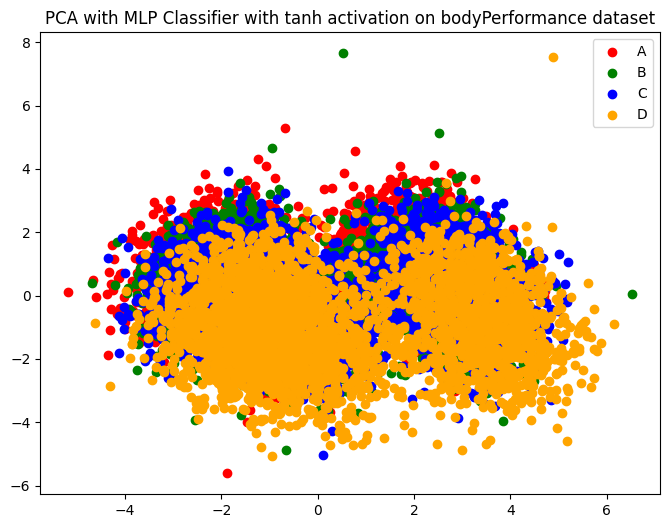

In [24]:
from sklearn.decomposition import PCA
# PCA로 2D로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 결과 시각화
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(['red', 'green', 'blue', 'orange'], [0, 1, 2, 3], ['A', 'B', 'C', 'D']):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title("PCA with MLP Classifier with tanh activation on bodyPerformance dataset")
plt.show()

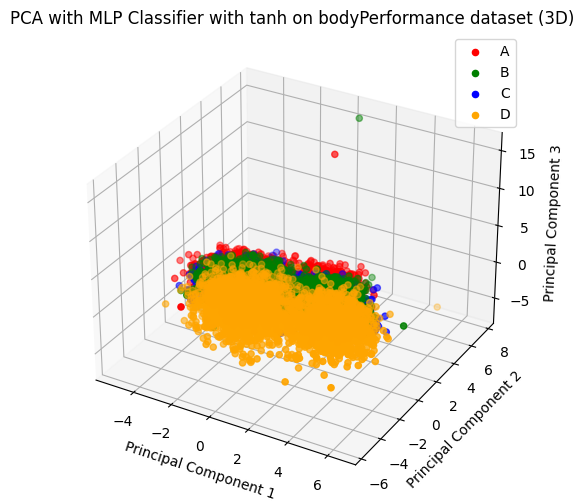

In [32]:
from mpl_toolkits.mplot3d import Axes3D

# PCA로 3D로 차원 축소
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 결과 시각화
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue', 'orange']
labels = ['A', 'B', 'C', 'D']

for color, i, target_name in zip(colors, range(4), labels):
    ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2], color=color, label=target_name)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title("PCA with MLP Classifier with tanh on bodyPerformance dataset (3D)")

ax.legend(loc='best')
plt.show()

#happydata dataset

데이터: Happiness Classification Dataset

주변 환경을 통해 행복 여부를 (1) 또는 (0)으로 예측하고자 함

**참고 문서 : https://www.kaggle.com/code/divyam88/happiness-classification**

**전처리와 성능 평가 부분은 이 문서를 대부분 참고하였음**

##전처리

In [33]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/happydata.csv')
df

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0
...,...,...,...,...,...,...,...
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
140,5,3,3,4,4,5,1
141,4,3,3,4,4,5,0


이 데이터셋은 infoavail	housecost schoolquality	policetrust	streetquality	ëvents의 6가지 설문 답변(1~5사이의 값)과 행복 여부에 대한 답변(불행: 0, 행복: 1)을 포함하고 있다.

events를 우리가 익숙한 알파벳으로 바꿔준다.

In [34]:
df.rename(columns={'ëvents':'events'}, inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   events         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [36]:
df.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,events,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [37]:
df.columns

Index(['infoavail', 'housecost', 'schoolquality', 'policetrust',
       'streetquality', 'events', 'happy'],
      dtype='object')

결측치는 존재하지 않는다.

In [38]:
df.isnull().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
events           0
happy            0
dtype: int64

중복된 답변의 설문은 제거해준다.

In [39]:
df.duplicated().sum()

18

In [40]:
df.drop_duplicates()

,infoavail,housecost,schoolquality,policetrust,streetquality,events,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
5,5,5,3,5,5,5,1
...,...,...,...,...,...,...,...
137,5,2,3,4,4,3,1
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
141,4,3,3,4,4,5,0


happy와 다른 colum의 상호연관성을 살펴본다

<Axes: >

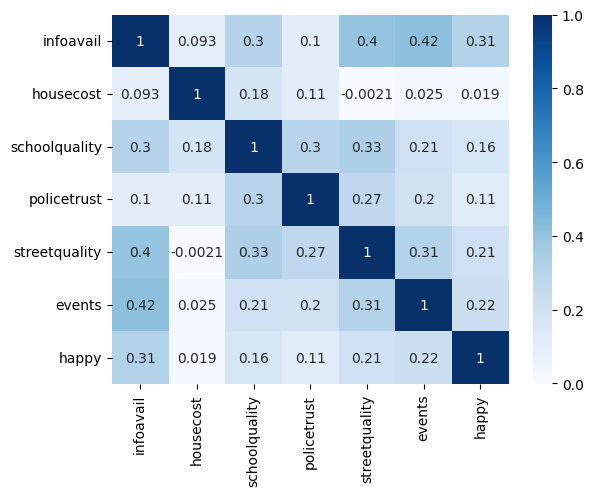

In [41]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='Blues')

housecost만 연관성이 현저히 낮은 것을 확인할 수 있다.

In [42]:
cor = df.corr()['happy'].sort_values(ascending=True)
cor

housecost        0.019368
policetrust      0.113356
schoolquality    0.163639
streetquality    0.206685
events           0.220729
infoavail        0.312740
happy            1.000000
Name: happy, dtype: float64

연관성이 낮은 housecost를 제거한다.

In [43]:
df = df.drop(['housecost'], axis=1)

In [44]:
df.describe()

,infoavail,schoolquality,policetrust,streetquality,events,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


데이터를 test/train으로 분할한다.

In [45]:
from sklearn.model_selection import train_test_split
X = df.drop(columns= 'happy', axis =1)
Y = df['happy']

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, stratify=Y, test_size = 0.1, random_state = 42)

In [46]:
print(X_train.shape, X_test.shape)

(128, 5) (15, 5)


In [47]:
print(Y_train.shape, Y_test.shape)

(128,) (15,)


지속적으로 사용하기 위해 모델 평가를 함수로 만든 코드를 사용하였다.

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

##tanh 활성화 함수 적용 & 평가

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import elu

##tanh

In [50]:
model = Sequential()
model.add(Dense(10, input_dim=5))
model.add(Dense(10, activation='tanh'))  # tanh 활성화 함수 적용
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [51]:
model.fit(X_train, Y_train, epochs=1000, batch_size=10, verbose=0)

In [52]:
Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)
Y_test_pred = (Y_test_pred > 0.5).astype(int).reshape(Y_test.shape)
Y_train_pred = (Y_train_pred > 0.5).astype(int).reshape(Y_train.shape)

4/4 [==============================] - 0s 4ms/step


In [53]:
error_report = pd.concat([measure_error(Y_train, Y_train_pred, 'train'), measure_error(Y_test, Y_test_pred, 'test')], axis=1)
error_report

,train,test
accuracy,0.726562,0.666667
precision,0.702381,0.636364
recall,0.855072,0.875000
f1,0.771242,0.736842


In [54]:
print(classification_report(Y_test, Y_test_pred))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_test_pred), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_test_pred), 2))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.64      0.88      0.74         8

    accuracy                           0.67        15
   macro avg       0.69      0.65      0.64        15
weighted avg       0.69      0.67      0.65        15

Accuracy score:  0.67
F1 Score:  0.74


##ReLU

In [ ]:
model_relu = Sequential()
model_relu.add(Dense(10, input_dim=5))
model_relu.add(Dense(10, activation='relu'))  # ReLU 활성화 함수 적용
model_relu.add(Dense(1, activation='sigmoid'))

model_relu.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
model_relu.fit(X_train, Y_train, epochs=1000, batch_size=10, verbose=0)

In [ ]:
Y_test_pred = model_relu.predict(X_test)
Y_train_pred = model_relu.predict(X_train)
Y_test_pred = (Y_test_pred > 0.5).astype(int).reshape(Y_test.shape)
Y_train_pred = (Y_train_pred > 0.5).astype(int).reshape(Y_train.shape)

4/4 [==============================] - 0s 4ms/step


In [ ]:
error_report = pd.concat([measure_error(Y_train, Y_train_pred, 'train'), measure_error(Y_test, Y_test_pred, 'test')], axis=1)
error_report

,train,test
accuracy,0.710938,0.600000
precision,0.710526,0.600000
recall,0.782609,0.750000
f1,0.744828,0.666667


In [ ]:
print(classification_report(Y_test, Y_test_pred))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_test_pred), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_test_pred), 2))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.60      0.75      0.67         8

    accuracy                           0.60        15
   macro avg       0.60      0.59      0.58        15
weighted avg       0.60      0.60      0.59        15

Accuracy score:  0.6
F1 Score:  0.67


## Leaky ReLU

In [ ]:
model_Lrelu = Sequential()
model_Lrelu.add(Dense(10, input_dim=5))
model_Lrelu.add(LeakyReLU(alpha=0.01))  # LeakyReLU 활성화 함수 적용
model_Lrelu.add(Dense(1, activation='sigmoid'))

model_Lrelu.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
model_Lrelu.fit(X_train, Y_train, epochs=1000, batch_size=10, verbose=0)

In [ ]:
Y_test_pred = model_Lrelu.predict(X_test)
Y_train_pred = model_Lrelu.predict(X_train)
Y_test_pred = (Y_test_pred > 0.5).astype(int).reshape(Y_test.shape)
Y_train_pred = (Y_train_pred > 0.5).astype(int).reshape(Y_train.shape)

4/4 [==============================] - 0s 3ms/step


In [ ]:
error_report = pd.concat([measure_error(Y_train, Y_train_pred, 'train'), measure_error(Y_test, Y_test_pred, 'test')], axis=1)
error_report

,train,test
accuracy,0.789062,0.733333
precision,0.808824,0.750000
recall,0.797101,0.750000
f1,0.802920,0.750000


In [ ]:
print(classification_report(Y_test, Y_test_pred))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_test_pred), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_test_pred), 2))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.75      0.75      0.75         8

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

Accuracy score:  0.73
F1 Score:  0.75


##ELU

In [ ]:
model_elu = Sequential()
model_elu.add(Dense(10, input_dim=5))
model_elu.add(Dense(10, activation=elu))  # ELU 활성화 함수 적용
model_elu.add(Dense(1, activation='sigmoid'))

model_elu.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
model_elu.fit(X_train, Y_train, epochs=1000, batch_size=10, verbose=0)

In [ ]:
Y_test_pred = model_elu.predict(X_test)
Y_train_pred = model_elu.predict(X_train)
Y_test_pred = (Y_test_pred > 0.5).astype(int).reshape(Y_test.shape)
Y_train_pred = (Y_train_pred > 0.5).astype(int).reshape(Y_train.shape)

4/4 [==============================] - 0s 3ms/step


In [ ]:
error_report = pd.concat([measure_error(Y_train, Y_train_pred, 'train'), measure_error(Y_test, Y_test_pred, 'test')], axis=1)
error_report

,train,test
accuracy,0.781250,0.733333
precision,0.847458,0.833333
recall,0.724638,0.625000
f1,0.781250,0.714286


In [ ]:
print(classification_report(Y_test, Y_test_pred))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_test_pred), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_test_pred), 2))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.83      0.62      0.71         8

    accuracy                           0.73        15
   macro avg       0.75      0.74      0.73        15
weighted avg       0.76      0.73      0.73        15

Accuracy score:  0.73
F1 Score:  0.71


##결과 정리


              Accuracy score    F1 Score

           tanh       0.67      0.74
           ReLU       0.6       0.67
           Leaky ReLU 0.73      0.75
           ELU        0.73      0.71

#riseClassification dataset

### 라이브러리 임포트 및 데이터셋 로드

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd

from tensorflow import keras
from keras.layers import Dense, InputLayer, Lambda
from keras.optimizers import Adam
from keras.activations import hard_sigmoid

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


df = pd.read_csv('riceClassification.csv')
df.shape

(18185, 12)

## 결측치 확인 및 Train, Test split

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [57]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42, shuffle=True)
X_train.shape

(12729, 10)

##hard_sigmoid

### Model 구성
- Keras를 이용해 hard sigmold 적용된 모델 생성
- 옵티마이저 설정 및 학습 진행

In [ ]:
# 인공신경망 모델 생성 및 학습
model = keras.Sequential([
    InputLayer(input_shape=10),
    Lambda(lambda x: hard_sigmoid(x)),
    Dense(10, activation="hard_sigmoid"),
    Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 10)                0         
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

epochs = 20
batch_size = 100

his = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/20
128/128 [==============================] - 9s 6ms/step - loss: 0.6868 - accuracy: 0.5491
Epoch 2/20
128/128 [==============================] - 1s 5ms/step - loss: 0.6804 - accuracy: 0.5619
Epoch 3/20
128/128 [==============================] - 1s 5ms/step - loss: 0.6701 - accuracy: 0.5883
Epoch 4/20
128/128 [==============================] - 1s 4ms/step - loss: 0.6564 - accuracy: 0.6374
Epoch 5/20
128/128 [==============================] - 1s 5ms/step - loss: 0.6333 - accuracy: 0.6878
Epoch 6/20
128/128 [==============================] - 1s 6ms/step - loss: 0.6028 - accuracy: 0.7756
Epoch 7/20
128/128 [==============================] - 1s 6ms/step - loss: 0.5626 - accuracy: 0.8298
Epoch 8/20
128/128 [==============================] - 1s 5ms/step - loss: 0.5206 - accuracy: 0.8687
Epoch 9/20
128/128 [==============================] - 1s 4ms/step - loss: 0.4781 - accuracy: 0.8964
Epoch 10/20
128/128 [==============================] - 1s 6ms/step - loss: 0.4340 - accuracy: 0.9192

### Loss, Accuarcy 그래프화 / Confusion Matrix 시각화

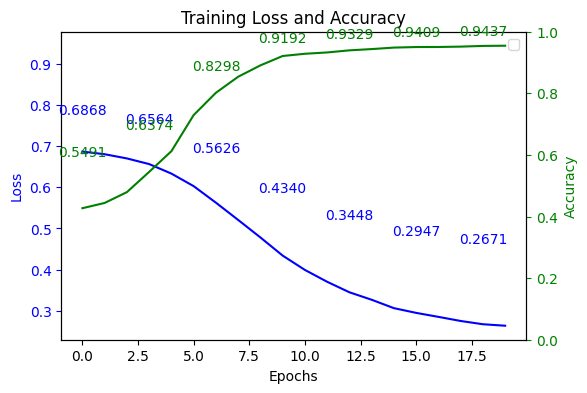

In [ ]:
# 손실과 정확도 시각화
plt.figure(figsize=(6, 4))

# 손실 및 정확도 시각화
plt.plot(his.history['loss'], label='Training Loss', color='blue')
plt.plot(his.history['accuracy'], label='Training Accuracy', color='green')

plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss',color="blue")
plt.tick_params('y', colors='blue')

# 오른쪽 y 축에 정확도 추가
plt.gca().twinx()
plt.ylabel('Accuracy', color='green')
plt.tick_params('y', colors='green')

# 그래프 중간에 실제 값 표시
for i, txt in enumerate(his.history['loss']):
    if i%3==0:
        plt.annotate(f"{txt:.4f}", (i, txt), textcoords="offset points", xytext=(0,10), ha='center', color='blue')

for i, txt in enumerate(his.history['accuracy']):
    if i%3==0:
        plt.annotate(f"{txt:.4f}", (i, txt), textcoords="offset points", xytext=(0,10), ha='center', color='green')

plt.legend()
plt.show()


171/171 [==============================] - 0s 2ms/step
Accuracy: 0.9545


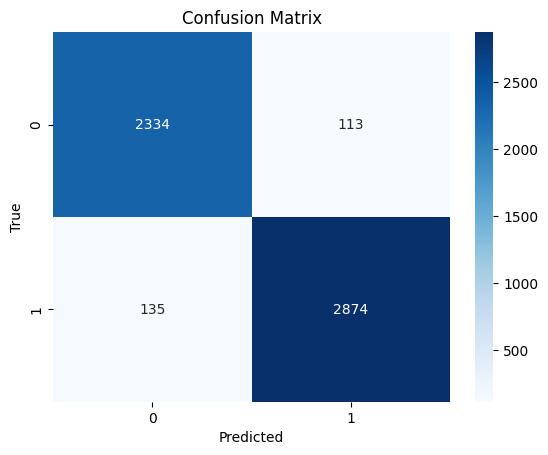

In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

# 정확도
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.4f}")

# confusion matrix 생성
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# confusion matrix 시각화
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 2차원 3차원 시각화
- 여기는 사실 chat gpt를 이용했습니다...

171/171 [==============================] - 0s 2ms/step


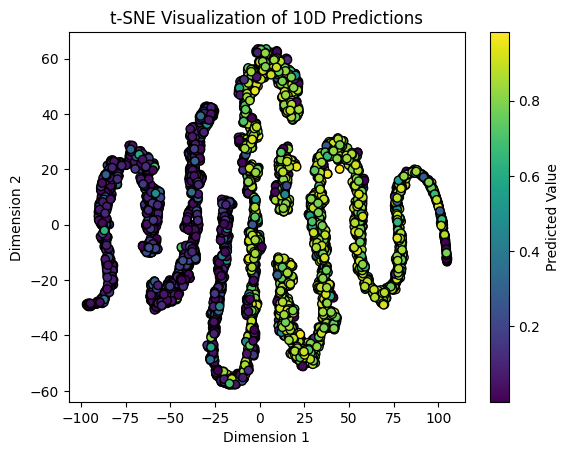

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_2d = tsne.fit_transform(X_test)

# Use the trained Keras model to predict on the training data
y_pred = model.predict(X_test)

# Create a scatter plot
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_pred, cmap='viridis', edgecolors='k')

# Set plot labels and show the plot
plt.title('t-SNE Visualization of 10D Predictions')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Predicted Value')
plt.show()

171/171 [==============================] - 0s 2ms/step


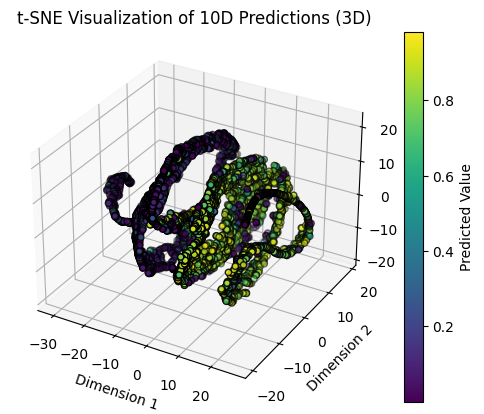

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

tsne = TSNE(n_components=3, random_state=42, n_jobs=-1)
X_3d = tsne.fit_transform(X_test)

y_pred = model.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y_pred, cmap='viridis', edgecolors='k')

ax.set_title('t-SNE Visualization of 10D Predictions (3D)')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
fig.colorbar(scatter, label='Predicted Value')
plt.show()

##tanh

### Model 구성
- Keras를 이용해 tanh 적용된 모델 생성
- 옵티마이저 설정 및 학습 진행

In [63]:
from keras.activations import tanh

# 인공신경망 모델 생성 및 학습
model = keras.Sequential([
    InputLayer(input_shape=10),
    Lambda(lambda x: hard_sigmoid(x)),
    Dense(10, activation="tanh"),
    Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

epochs = 20
batch_size = 100

his = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/20
128/128 [==============================] - 3s 10ms/step - loss: 0.6920 - accuracy: 0.5315
Epoch 2/20
128/128 [==============================] - 1s 7ms/step - loss: 0.6744 - accuracy: 0.5969
Epoch 3/20
128/128 [==============================] - 1s 8ms/step - loss: 0.6223 - accuracy: 0.6848
Epoch 4/20
128/128 [==============================] - 1s 5ms/step - loss: 0.5062 - accuracy: 0.8581
Epoch 5/20
128/128 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.8923
Epoch 6/20
128/128 [==============================] - 0s 2ms/step - loss: 0.3403 - accuracy: 0.9186
Epoch 7/20
128/128 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.9372
Epoch 8/20
128/128 [==============================] - 0s 2ms/step - loss: 0.2789 - accuracy: 0.9334
Epoch 9/20
128/128 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.9437
Epoch 10/20
128/128 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.943

### Loss, Accuarcy 그래프화 / Confusion Matrix 시각화

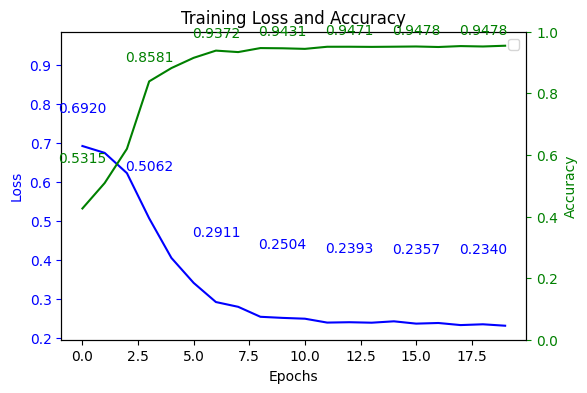

In [65]:
# 손실과 정확도 시각화
plt.figure(figsize=(6, 4))

# 손실 및 정확도 시각화
plt.plot(his.history['loss'], label='Training Loss', color='blue')
plt.plot(his.history['accuracy'], label='Training Accuracy', color='green')

plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss',color="blue")
plt.tick_params('y', colors='blue')

# 오른쪽 y 축에 정확도 추가
plt.gca().twinx()
plt.ylabel('Accuracy', color='green')
plt.tick_params('y', colors='green')

# 그래프 중간에 실제 값 표시
for i, txt in enumerate(his.history['loss']):
    if i%3==0:
        plt.annotate(f"{txt:.4f}", (i, txt), textcoords="offset points", xytext=(0,10), ha='center', color='blue')

for i, txt in enumerate(his.history['accuracy']):
    if i%3==0:
        plt.annotate(f"{txt:.4f}", (i, txt), textcoords="offset points", xytext=(0,10), ha='center', color='green')

plt.legend()
plt.show()


171/171 [==============================] - 0s 1ms/step
Accuracy: 0.9355


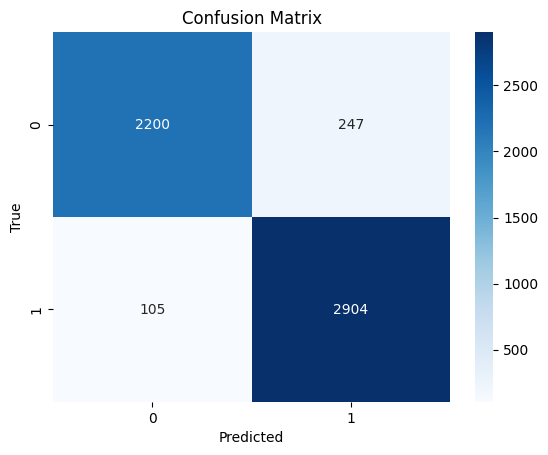

In [66]:
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

# 정확도
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.4f}")

# confusion matrix 생성
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# confusion matrix 시각화
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 2차원 3차원 시각화

171/171 [==============================] - 0s 1ms/step


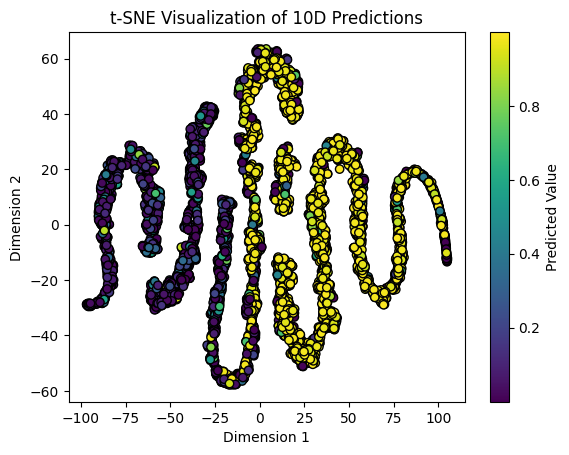

In [67]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_2d = tsne.fit_transform(X_test)

# Use the trained Keras model to predict on the training data
y_pred = model.predict(X_test)

# Create a scatter plot
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_pred, cmap='viridis', edgecolors='k')

# Set plot labels and show the plot
plt.title('t-SNE Visualization of 10D Predictions')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Predicted Value')
plt.show()

171/171 [==============================] - 1s 3ms/step


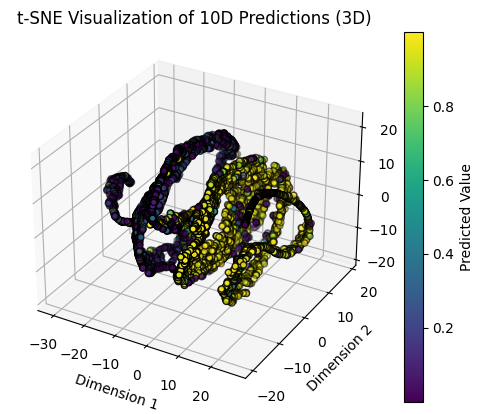

In [68]:
from mpl_toolkits.mplot3d import Axes3D

tsne = TSNE(n_components=3, random_state=42, n_jobs=-1)
X_3d = tsne.fit_transform(X_test)

y_pred = model.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y_pred, cmap='viridis', edgecolors='k')

ax.set_title('t-SNE Visualization of 10D Predictions (3D)')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
fig.colorbar(scatter, label='Predicted Value')
plt.show()

##결과 정리
hard_sigmoid Accuracy: 0.9545  
tanh Accuracy: 0.9355

#최종 결과
happydata dataset  
Leaky ReLU>ELU>tanh>ReLU 순으로 성능 좋음  
  
riseClassification dataset  
hard_sigmoid<tanh 순으로 성능 좋음